In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                              StackingClassifier)
from sklearn.preprocessing import LabelEncoder, minmax_scale
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
fruits=pd.read_csv("E:/Python Programs/fruits.csv")
X = fruits[["sphericity", "weight"]]
y = fruits["label"]

In [4]:
X = pd.DataFrame(minmax_scale(X), columns=X.columns)
X.describe()

,sphericity,weight
count,60.000000,60.000000
mean,0.466596,0.503012
std,0.285133,0.281356
min,0.000000,0.000000
25%,0.241561,0.277108
50%,0.476793,0.506024
75%,0.677215,0.759036
max,1.000000,1.000000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [6]:
stc_model = StackingClassifier(estimators=[("dt", DecisionTreeClassifier(criterion="entropy")), 
                                           ("knn", KNeighborsClassifier(n_neighbors=5, weights="distance")),
                                          ("lr", LogisticRegression()),
                                          ("svm", LinearSVC())],
                              cv=5)
stc_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy')),
                               ('knn',
                                KNeighborsClassifier(weights='distance')),
                               ('lr', LogisticRegression()),
                               ('svm', LinearSVC())])

In [7]:
stc_model.score(X_test, y_test)

0.9333333333333333

In [8]:
wisc = pd.read_csv("E:/Python Programs/wisc_bc_data.csv")
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
X = wisc[["radius_mean", "concave points_mean", "concavity_mean"]]
y = wisc["diagnosis"]

In [10]:
X = pd.DataFrame(minmax_scale(X), columns=X.columns)
X.describe()

,radius_mean,concave points_mean,concavity_mean
count,569.000000,569.000000,569.000000
mean,0.338222,0.243137,0.208058
std,0.166787,0.192857,0.186785
min,0.000000,0.000000,0.000000
25%,0.223342,0.100944,0.069260
50%,0.302381,0.166501,0.144189
75%,0.416442,0.367793,0.306232
max,1.000000,1.000000,1.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)
X_train.shape, X_test.shape

((426, 3), (143, 3))

In [33]:
stc_model = StackingClassifier(estimators=[("dt", DecisionTreeClassifier(criterion="entropy", max_depth=8)),
                                           ("dt1", DecisionTreeClassifier(criterion="gini", max_leaf_nodes=20)),
                                           ("dt2", DecisionTreeClassifier(criterion="log_loss", max_depth=8)),
                                           ("dt4", DecisionTreeClassifier(criterion="entropy", splitter='random')),
                                           ('rf',RandomForestClassifier(n_estimators=15, criterion="entropy", bootstrap=True, max_samples=200)),
                                           ("knn", KNeighborsClassifier(n_neighbors=10, weights="distance")),
                                          ("lr", LogisticRegression()),
                                          ("svm", LinearSVC())],
                              cv=5)
stc_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=8)),
                               ('dt1',
                                DecisionTreeClassifier(max_leaf_nodes=20)),
                               ('dt2',
                                DecisionTreeClassifier(criterion='log_loss',
                                                       max_depth=8)),
                               ('dt4',
                                DecisionTreeClassifier(criterion='entropy',
                                                       splitter='random')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_samples=200,
                                                       n_estimators=15)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=10,
                                                     weights='distance')),
                               ('lr', LogisticRegression()),
                               ('svm', LinearSVC())])

In [34]:
stc_model.score(X_test, y_test)

0.9300699300699301

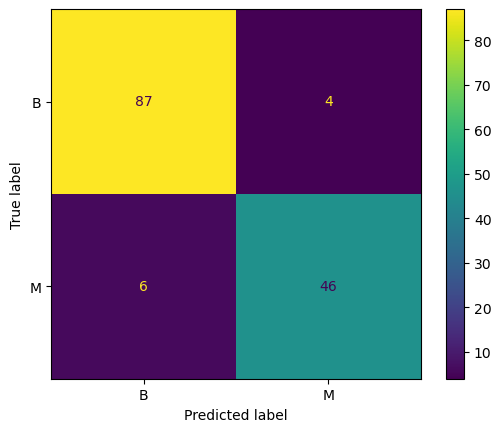

In [35]:
ConfusionMatrixDisplay.from_estimator(stc_model, X_test, y_test)
plt.show()